### THINK TANK CASE STUDY

## GLOBAL OBJECTIVES

1.) Describe the datasets and the eventual anomalies you find.

2.) Which patterns do you find in the purchasing behavior of the customers?

3.) What are the categories and products the customers are most interested in?

4.) Split customers into different groups based on their purchasing behavior 

5.) Justify your choice for your adopted method(s) and model(s).

6.) Describe the defined customer groups. What are the features which are driving the differentiation amongst the different groups?

7.) Optional: Give suggestions on how the business should treat these clusters differently.

8.) At this point in your analysis, you are the dataset expert. Implement in your notebook any further ideas (initiatives, further analyses) you might have in mind which can be helpful for the business.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import warnings
import plotly.express as px
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import dash_bootstrap_components as dbc

## LOADING DATASET

In [5]:
cs1 = pd.read_csv("Final Data.csv")

In [6]:
cs1

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [7]:
cs1.dtypes

order_id                    int64
user_id                     int64
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
department_id               int64
department                 object
product_name               object
dtype: object

In [8]:
cs1['days_since_prior_order']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2019496    5.0
2019497    3.0
2019498    3.0
2019499    3.0
2019500    3.0
Name: days_since_prior_order, Length: 2019501, dtype: float64

In [9]:
cs1['product_name'].nunique()

134

In [10]:
cs1['department'].nunique()

21

In [11]:
cs1['department'].unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [12]:
cs1['days_since_prior_order'].isnull().sum()

124342

In [13]:
cs1.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [14]:
cs1[cs1['days_since_prior_order'].isnull()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019349,3231704,187116,1,6,9,NaN,31,2,0,7,beverages,refrigerated
2019350,3231704,187116,1,6,9,NaN,24,3,0,4,produce,fresh fruits
2019351,3231704,187116,1,6,9,NaN,83,4,0,4,produce,fresh vegetables
2019352,3231704,187116,1,6,9,NaN,24,5,0,4,produce,fresh fruits


## INVESTIGATING ALL ELEMENTS WITHIN EACH FEATURES

In [17]:
for colum in cs1:
    unique_values = np.unique(cs1[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} -- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 -- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 -- [0 1]
The number of unique values for features department_id : 21 -- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 -- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']
The

In [18]:
cs1.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

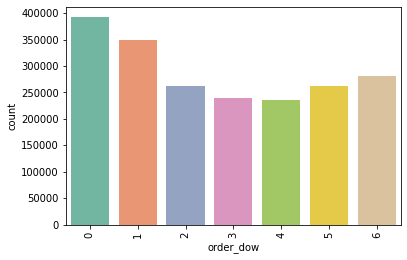

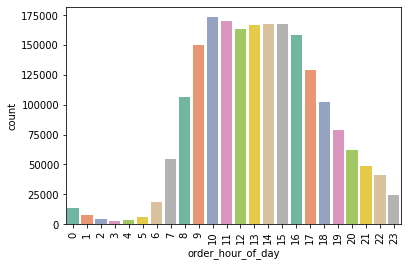

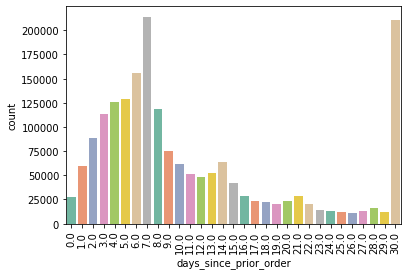

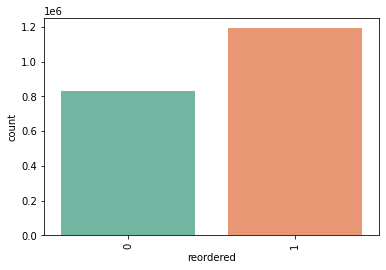

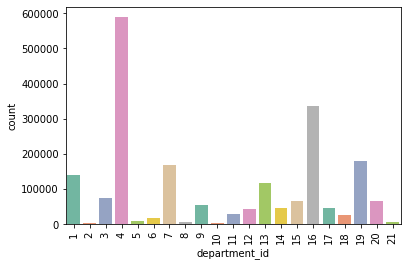

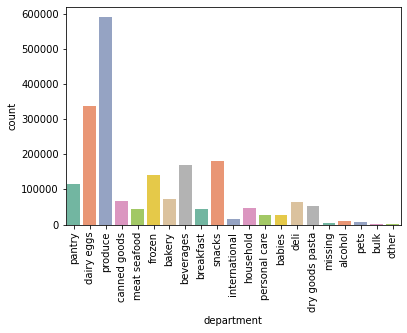

In [28]:
features = ['order_dow', 'order_hour_of_day',
       'days_since_prior_order','reordered', 'department_id', 'department']


for f in features:
    sns.countplot(x=f,data=cs1, palette="Set2")
    plt.xticks(rotation =90)
    plt.show()
